# House Price Prediction using Machine Learning in Python

# Step 1: Importing Libraries and Dataset
In the first step we load the libraries which is needed for Prediction:

Pandas - To load the Dataframe.-----
Matplotlib - To visualize the data features i.e. barplot.------
Seaborn - To see the correlation between features using heatmap.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("Housing.csv")

print(dataset.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [24]:
dataset.shape

(545, 13)

# Step 2: Data Preprocessing

In [25]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 7
Integer variables: 6
Float variables: 0


# Step 3: Exploratory Data Analysis
EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables. 

<Axes: >

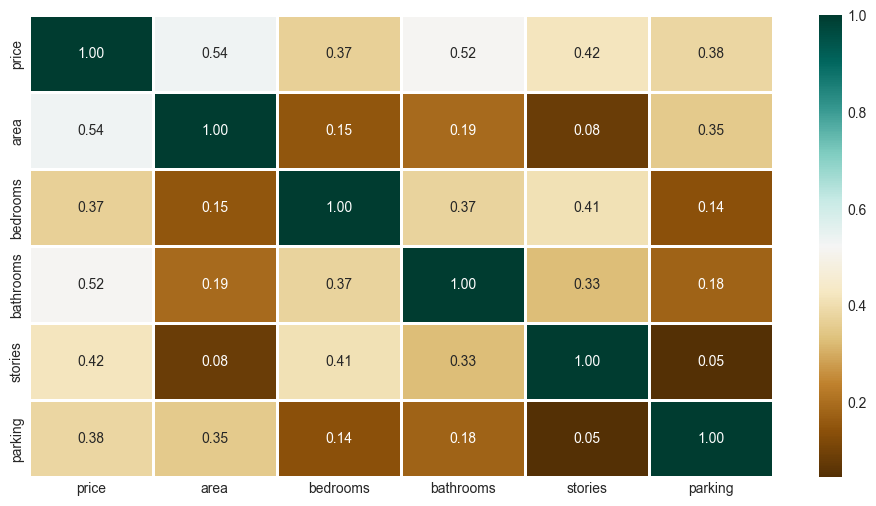

In [26]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

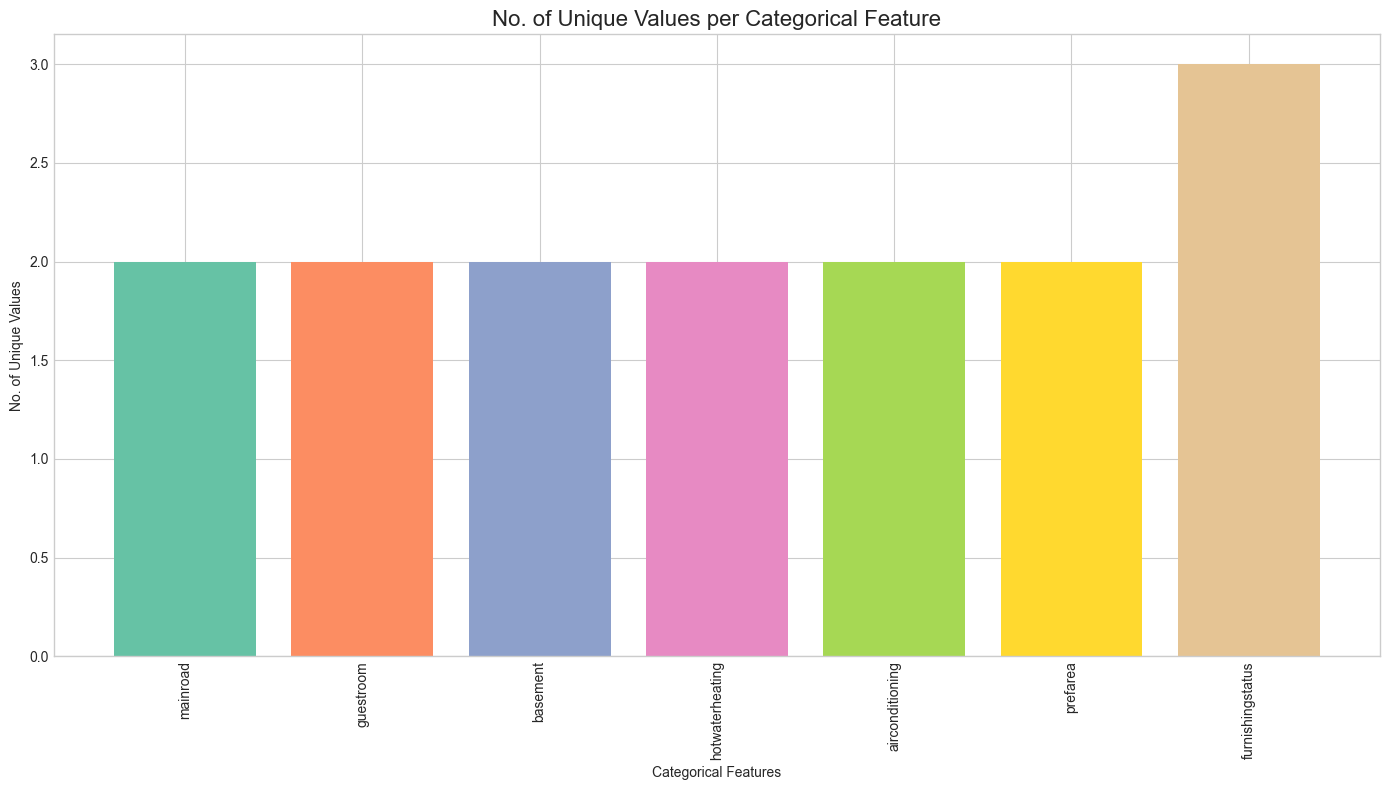

In [39]:

colors = sns.color_palette("Set2", len(object_cols))  # just for colors

plt.figure(figsize=(14,8))
bars = plt.bar(object_cols, unique_values, color=colors)  # matplotlib bar plot
plt.title('No. of Unique Values per Categorical Feature', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("No. of Unique Values")
plt.xlabel("Categorical Features")
plt.tight_layout()
plt.show()


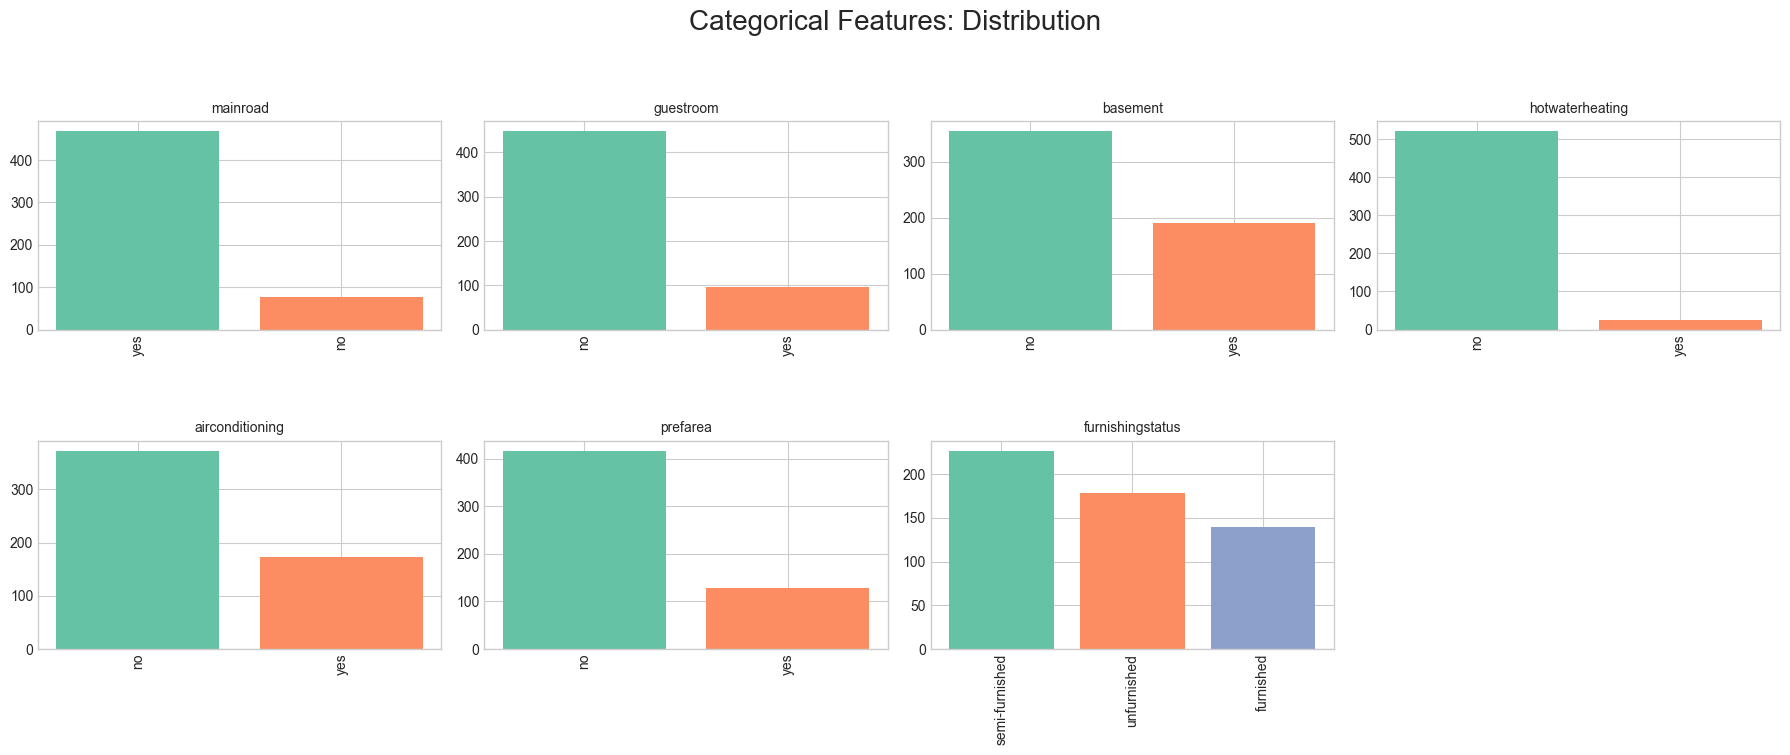

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 36))
plt.suptitle('Categorical Features: Distribution', fontsize=20)

index = 1
n_rows = 11
n_cols = 4

for col in object_cols:
    y = dataset[col].value_counts()
    ax = plt.subplot(n_rows, n_cols, index)
    ax.bar(y.index.astype(str), y.values, color=sns.color_palette("Set2", len(y)))
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis="x", rotation=90)
    index += 1

plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for suptitle
plt.show()


# Step 4: Data Cleaning
Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data. As in our dataset there are some columns that are not important and irrelevant for the model training. So we can drop that column before training.


In [45]:
dataset.drop(['stories'],
             axis=1,
             inplace=True)

In [52]:
dataset['price'] = dataset['price'].fillna(
  dataset['price'].mean())

In [53]:
new_dataset = dataset.dropna()

In [54]:
new_dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Step 5: OneHotEncoder - For Label categorical features
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int.

In [55]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
No. of. categorical features:  7


In [56]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# Step 6: Splitting Dataset into Training and Testing

In [58]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['price'], axis=1)
Y = df_final['price']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Step 7: Model Training and Accuracy


In [59]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.2710074386092272


In [60]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.18653381380685508

In [62]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.17430097803087907
